In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cost-of-living/cost-of-living.csv


In [19]:
# data needs to be transformed so we have the rows are cities.
data = pd.read_csv("/kaggle/input/cost-of-living/cost-of-living.csv", index_col=[0]).T.reset_index()
data = data.rename(columns={'index':'location'})
data.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


## *Which place in the world sells the most costly food?*

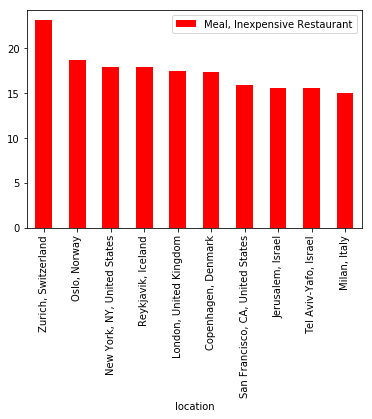

In [21]:
data[['Meal, Inexpensive Restaurant','location']].groupby(["location"]).median().sort_values(by='Meal, Inexpensive Restaurant',ascending=False).head(10).plot.bar(color='r')
plt.show()

# Compare the Lifestyle cost in Top Popular cities

In [22]:
data['lifestyle']=data['Monthly Pass (Regular Price)']+data['Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment']+data['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)']+data['Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)']+data['Fitness Club, Monthly Fee for 1 Adult']+data['Price per Square Meter to Buy Apartment in City Centre']+data['Average Monthly Net Salary (After Tax)']+data['Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate']

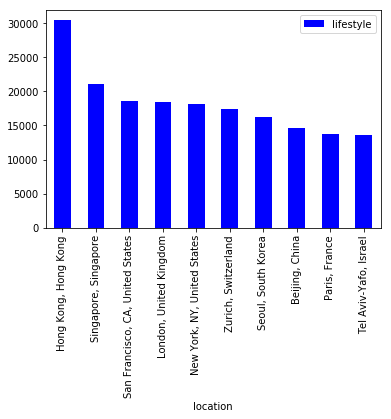

In [23]:
data[['lifestyle','location']].groupby(["location"]).median().sort_values(by='lifestyle',ascending=False).head(10).plot.bar(color='b')
plt.show()

## Which cities provide Education at lower cost?

In [24]:
data['schooling']=data['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child']+data['International Primary School, Yearly for 1 Child']

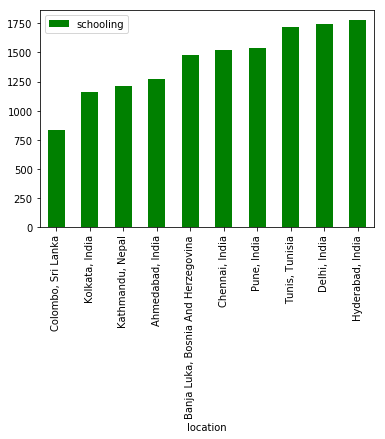

In [26]:
data[['schooling','location']].groupby(["location"]).median().sort_values(by='schooling',ascending=True).head(10).plot.bar(color='g')
plt.show()

## Which Countries are heavy on Transportation?

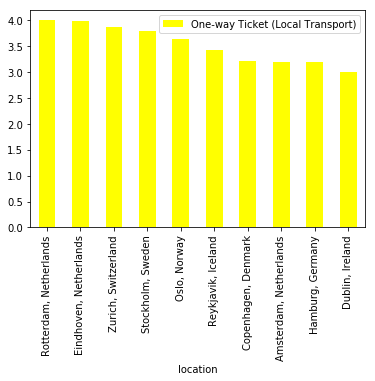

In [27]:
data[['One-way Ticket (Local Transport)','location']].groupby(["location"]).median().sort_values(by='One-way Ticket (Local Transport)',ascending=False).head(10).plot.bar(color='yellow')
plt.show()


## Which underdeveloped cities in the world are expensive to live

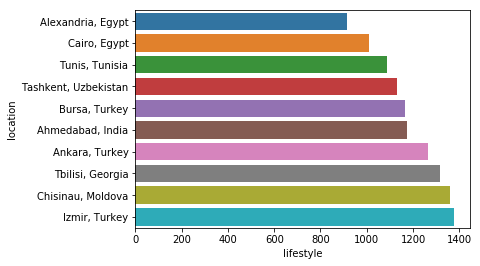

In [47]:
data_lifestyle = data.sort_values('lifestyle',ascending =True)
from matplotlib import pyplot
#fig, ax = pyplot.subplots(figsize=(20,15))
ax = sns.barplot(x='lifestyle', y='location',data = data_lifestyle.head(10))


## What are the most Expensive Items in most of the places

In [76]:
data_items=data.iloc[:,1:-5]

In [77]:
column=data_items.columns

In [93]:
#Aggregating maximum values from each columns and converting it to dataframe
max_valued_items={}
for i in column:
    max_valued_items[i]=max(data_items[i])
max_valued_items.del[]


In [96]:
max_valued_items_df=pd.DataFrame(max_valued_items.items(),columns=['Items', 'Value'])

In [106]:
max_valued_items_df=max_valued_items_df.drop(max_valued_items_df.index[4])

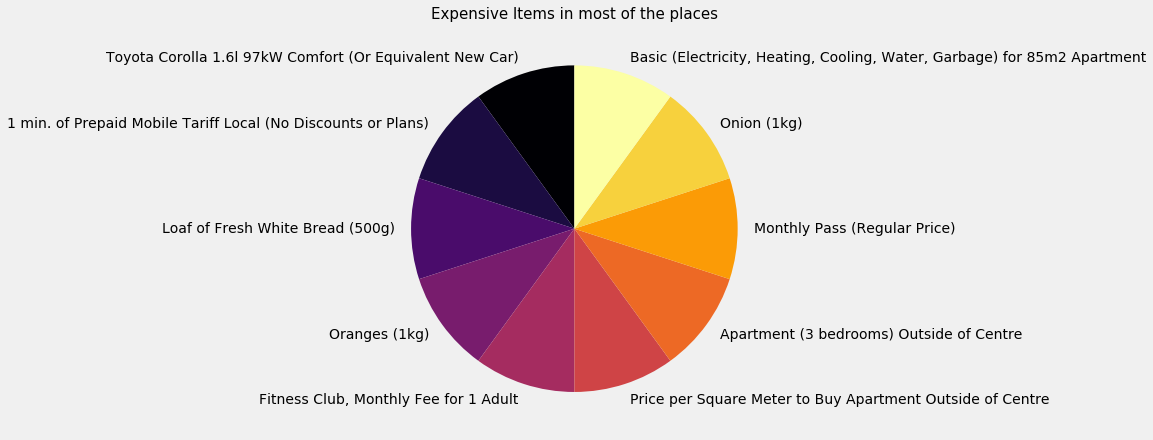

In [125]:
max_valued_items_df['Items'].value_counts().tail(10).plot(kind = 'pie', cmap = 'inferno',
                                        startangle = 90)
plt.title('Expensive Items in most of the places', fontsize = 15)
plt.axis('off')
plt.show()

## Which Items are Having Huge Price differences from place to place

In [127]:
data_items.shape

(160, 53)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53]), <a list of 53 Text xticklabel objects>)

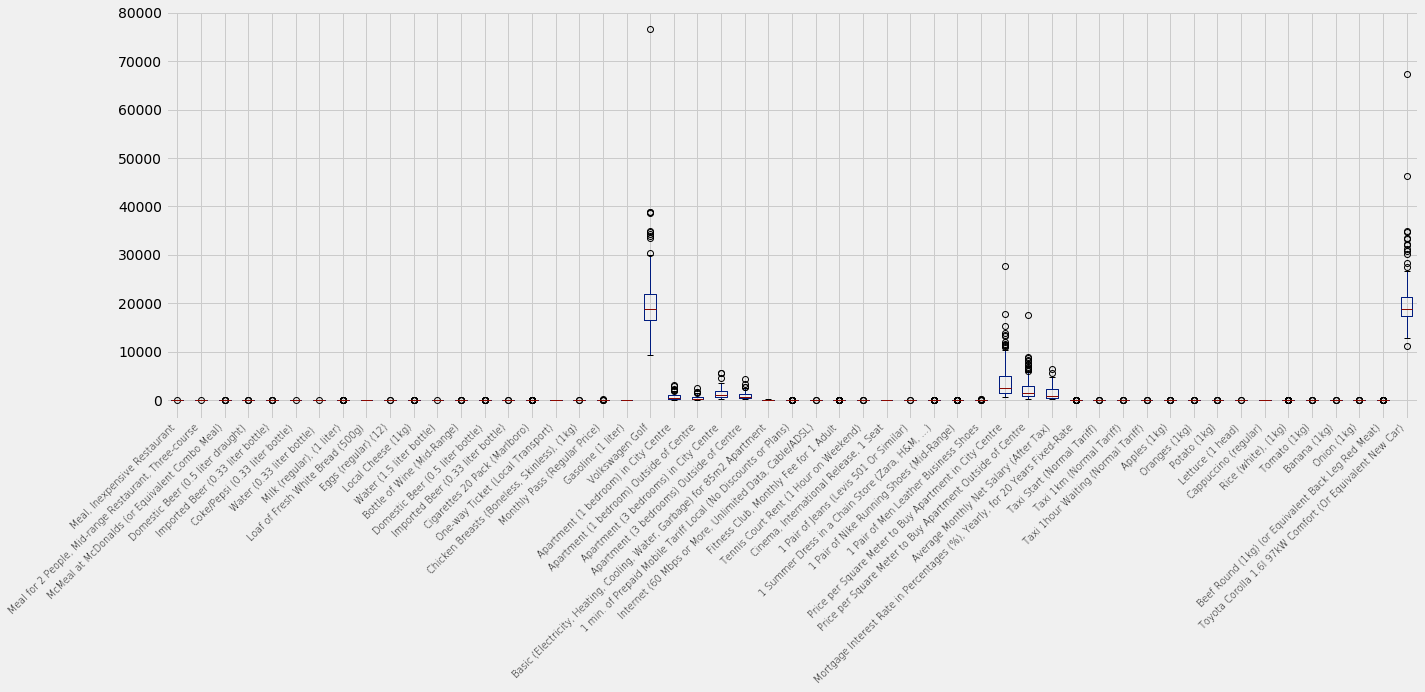

In [138]:
data_items.boxplot()
#plt.rcParams["xtick.labelsize"] = 30
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

## In which place Clothes Having highest price

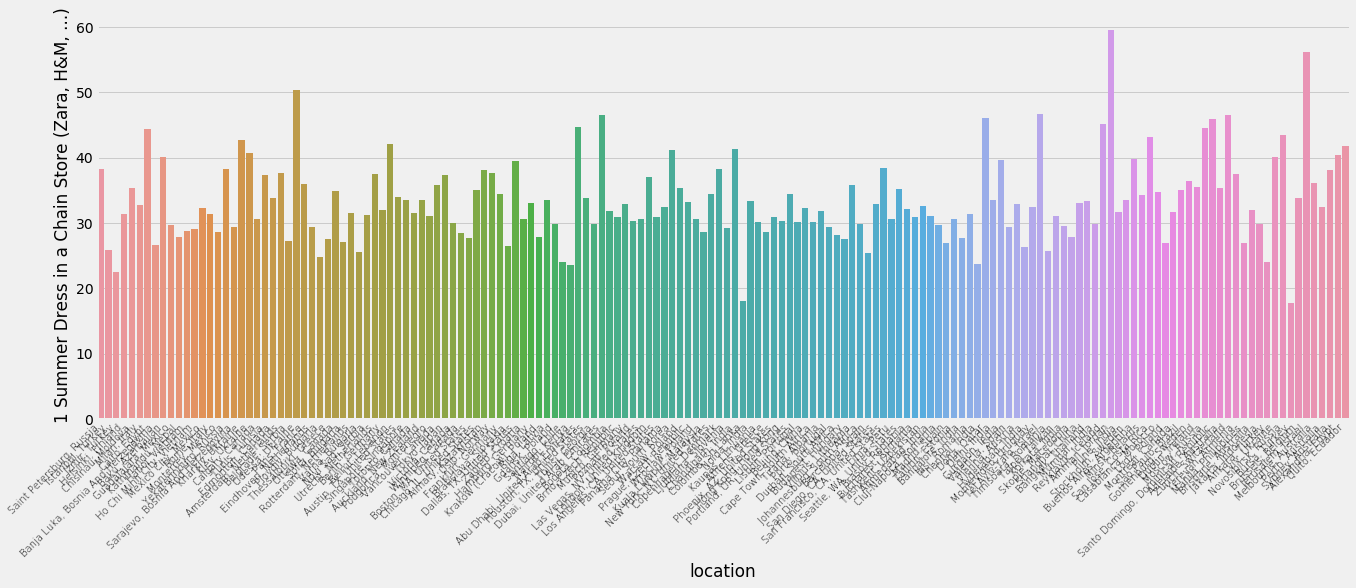

In [145]:
sns.barplot(x = 'location',
            y = '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
            data = data)
 
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)
plt.show()